In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [3]:
# Step 2: Load dataset
df = pd.read_csv('/content/twitter_training.csv', header=None)
df.columns = ['id', 'entity', 'sentiment', 'tweet']

# Show first 5 rows
df.head()


,id,entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Shape of dataset: (60955, 4)
Sentiment distribution:
 sentiment
Negative      17646
Positive      17220
Neutral       14658
Irrelevant    11431
Name: count, dtype: int64


/tmp/ipython-input-4-415742254.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


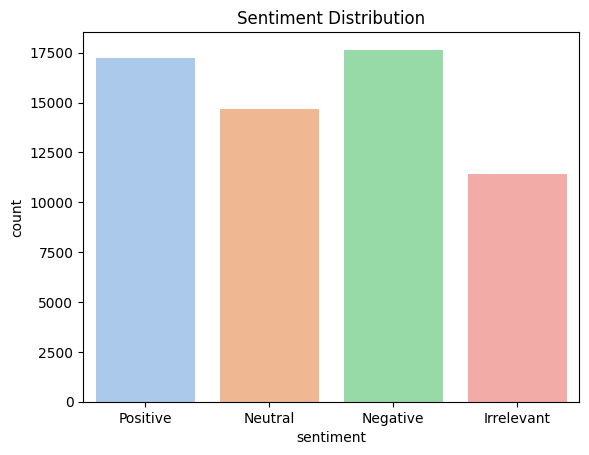

In [4]:
# Step 3: Data exploration
print("Shape of dataset:", df.shape)
print("Sentiment distribution:\n", df['sentiment'].value_counts())

# Visualize sentiment distribution
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Sentiment Distribution")
plt.show()


In [6]:
# Step 4: Clean tweets
def clean_tweet(text):
    # Ensure the input is a string
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase
    return text

df['clean_tweet'] = df['tweet'].apply(clean_tweet)

df[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [8]:
# Step 5: Prepare data for modeling
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_tweet'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize text data using CountVectorizer
vectorizer = CountVectorizer(max_features=5000) # Limit features to avoid memory issues
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Shape of X_train_vec:", X_train_vec.shape)
print("Shape of X_test_vec:", X_test_vec.shape)

Shape of X_train_vec: (48764, 5000)
Shape of X_test_vec: (12191, 5000)


In [ ]:

X = df['clean_tweet']
y = df['sentiment']


vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [10]:

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.8105979821179559

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.84      0.75      0.79      2220
    Negative       0.84      0.84      0.84      3622
     Neutral       0.81      0.76      0.79      2895
    Positive       0.77      0.85      0.81      3454

    accuracy                           0.81     12191
   macro avg       0.81      0.80      0.81     12191
weighted avg       0.81      0.81      0.81     12191



In [ ]:

def predict_sentiment(tweet):
    tweet_clean = clean_tweet(tweet)
    tweet_vec = vectorizer.transform([tweet_clean])
    return model.predict(tweet_vec)[0]

# Ask user to enter a tweet
user_input = input("Enter a tweet to analyze sentiment: ")
prediction = predict_sentiment(user_input)

print("Predicted Sentiment:", prediction)
